In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


def gibbs_sampler(mus, sigmas, n_iter=500):
    samples = []
    y = mus[1]
    for _ in range(n_iter):
        x = p_x_given_y(y, mus, sigmas)
        samples.append([x, y])
        y = p_y_given_x(x, mus, sigmas)
        samples.append([x, y])
    return samples


def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


mus = np.asarray([5, 5])
sigmas = np.asarray([[1, 0.9], [0.9, 1]])


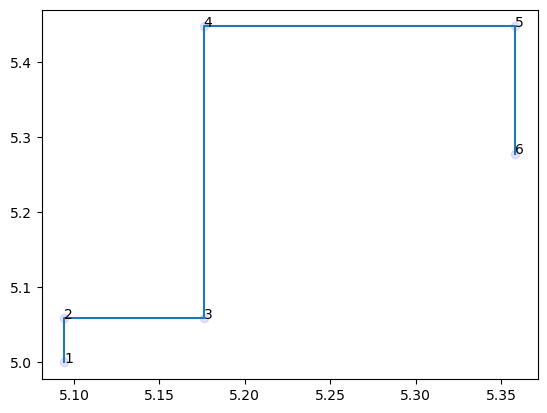

In [2]:
samples = gibbs_sampler(mus, sigmas, n_iter=3)
### draw the sampling path
x_set = list()
y_set = list()

for sample in samples:
    x_set.append(sample[0])
    y_set.append(sample[1])

count = range(len(x_set))

fig, ax = plt.subplots()
for i, txt in enumerate(count):
    ax.annotate(txt + 1, (x_set[i], y_set[i]))

ax.scatter(x_set, y_set, c="b", alpha=0.1)
ax.plot(x_set, y_set)
plt.show()

# burn = 100
# x, y = zip(*samples[burn:])
# sns.jointplot(x, y, kind='hex')
# plt.show()
#
# ### ground truth
# samples = np.random.multivariate_normal(mus, sigmas, 10000)
# sns.jointplot(samples[:, 0], samples[:, 1], kind='kde')
# plt.show()


### print sample mean

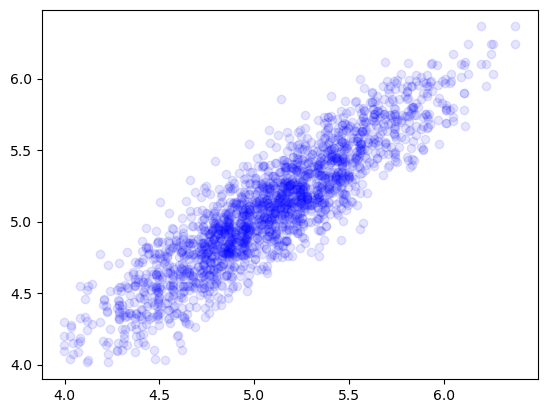

In [3]:
samples = gibbs_sampler(mus, sigmas, n_iter=1000)
### draw the sampling path
x_set = list()
y_set = list()

for sample in samples:
    x_set.append(sample[0])
    y_set.append(sample[1])

count = range(len(x_set))

fig, ax = plt.subplots()
# for i, txt in enumerate(count):
#     ax.annotate(txt+1, (x_set[i], y_set[i]))

ax.scatter(x_set, y_set, c="b", alpha=0.1)
# ax.plot(x_set, y_set)
plt.show()